# Linear Regression via brute force

- Given a set of points, draw a best fit line through those points
- Can be calculated with a formula, we ignore that here because we won't have a formula later.
- Naive method - always start with the naive method.
  - Just exhaustively search for a best fit line

In [7]:
import pandas as pd
import numpy as np

In [8]:
import seaborn as sns

## Data (Iris dataset)
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
df['species'] == 'Setosa'

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Name: species, Length: 150, dtype: bool

In [10]:
setosa = df[df['species'] == 'setosa']
virginica = df[df['species'] == 'virginica']

<Axes: xlabel='sepal_length'>

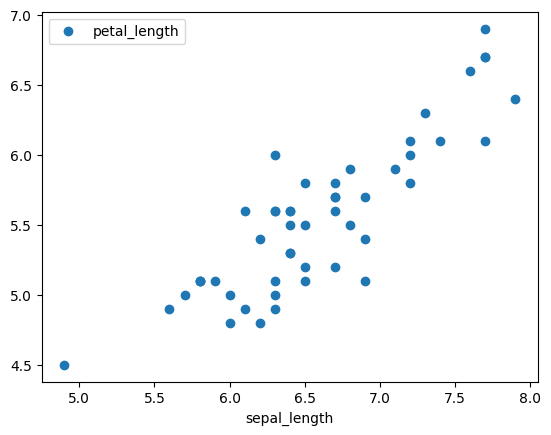

In [11]:
virginica.plot(x='sepal_length', y='petal_length', style='o')

<Axes: xlabel='sepal_length'>

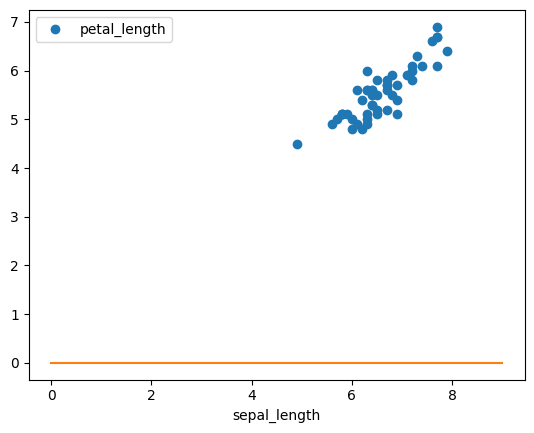

In [12]:
ax = virginica.plot(x='sepal_length', y='petal_length', style='o')

m = 0
b = 0
fit_line = pd.Series([m*x + b for x in range(0,10)])
fit_line.plot.line(ax=ax)

In [13]:
# mean squared error
def mse(actual, predicted):
    if len(actual) != len(predicted):
        raise Exception("actual must be the same size as predicted")

    total = 0.0
    for i in range(len(actual)):
        total += (predicted[i] - actual[i]) * (predicted[i] - actual[i])
    return total / len(actual)

def mse_data(m, b, data):
    actual = list(data['petal_length'])
    predicted = [m*x + b for x in list(data['sepal_length'])]
    return mse(actual, predicted)

In [14]:
min_error = mse_data(0, 0, virginica)
best_m = 0
best_b = 0
for m in np.arange(0.0, 2.0, 0.1):
    for b in np.arange(0.0, 1.0, 0.1):
        error = mse_data(m, b, virginica)
        if error < min_error:
            min_error = error
            best_m = m
            best_b = b
(best_m, best_b)

(0.8, 0.30000000000000004)

<Axes: xlabel='sepal_length'>

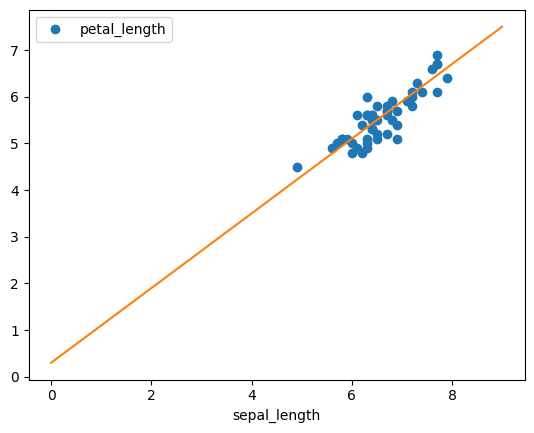

In [15]:
ax = virginica.plot(x='sepal_length', y='petal_length', style='o')
fit_line = pd.Series([best_m*x + best_b for x in range(0,10)])
fit_line.plot.line(ax=ax)

# Brute Force linear classification

- Also an introduction to vectorization

<Axes: xlabel='sepal_length'>

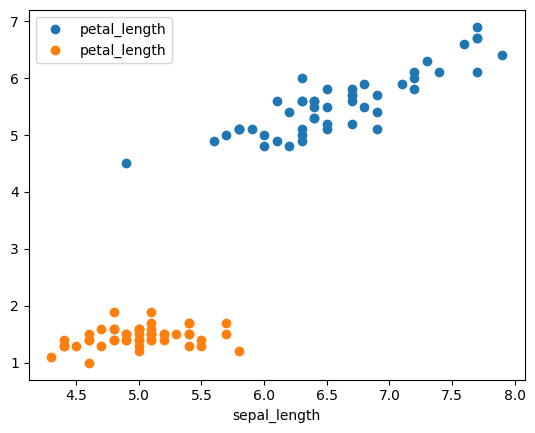

In [16]:
ax = virginica.plot(x='sepal_length', y='petal_length', style='o')
setosa.plot(x='sepal_length', y='petal_length', style='o', ax=ax)

In [17]:
X = np.array(df['sepal_length'])
Y = np.array(df['petal_length'])

In [18]:
# Manufacture a vectorized prediction function for weights y = mx + b
# m and b are fixed constnats when vlinear_predict is caled
# x takes on individual values in an numpy array
def vlinear_predict_class(m, b):
    return np.vectorize(lambda x,y: float(y < (m * x + b)))

In [19]:
predictions = vlinear_predict_class(0, 0)(X,Y)
predictions

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [20]:
actual = np.array(df['species'] == 'setosa', dtype=float)
actual

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [21]:
sum(actual != predictions)

50

In [22]:
predictions = vlinear_predict_class(0.0, 0)(X, Y)
min_error = sum(actual != predictions)

best_m = 0
best_b = 0
for m in np.arange(0.0, 3.0, 0.1):
    for b in np.arange(0.0, 3.0, 0.1):
        predictions = vlinear_predict_class(m, b)(X, Y)
        error = sum(actual != predictions)
        if error < min_error:
            min_error = error
            best_m = m
            best_b = b
(best_m, best_b, min_error)

(0.0, 1.9000000000000001, 0)

<Axes: xlabel='sepal_length'>

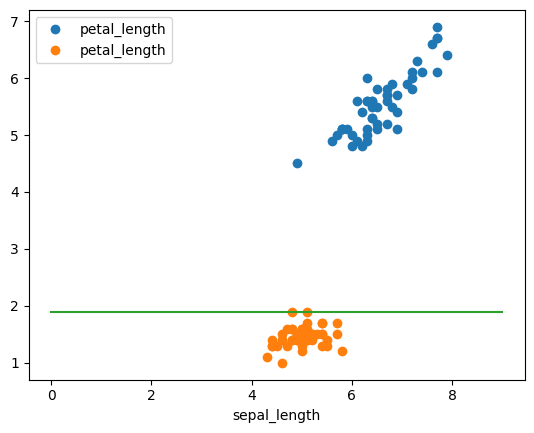

In [23]:
ax = virginica.plot(x='sepal_length', y='petal_length', style='o')
setosa.plot(x='sepal_length', y='petal_length', style='o', ax=ax)
fit_line = pd.Series([best_m * x + best_b for x in range(0, 10)])
fit_line.plot.line(ax=ax)